# Housing Prices Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from pandas import Series, DataFrame

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [ ]:
uh=pd.read_csv('USA_Housing.csv')
uh

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
uh.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


## Exploratory Data Analysis

In [ ]:
print('Housing Data: \n')
print("Number of columns: "+ str(uh.shape[1]))
print("Number of rows: "+ str(uh.shape[0]))

Housing Data: 

Number of columns: 7
Number of rows: 5000


In [ ]:
uh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Avg_Area_Income              5000 non-null   float64
 1   Avg_Area_House_Age           5000 non-null   float64
 2   Avg_Area_Number_of_Rooms     5000 non-null   float64
 3   Avg_Area_Number_of_Bedrooms  5000 non-null   float64
 4   Area_Population              5000 non-null   float64
 5   Price                        5000 non-null   float64
 6   Address                      5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
#descriptive statistics summary
uh['Price'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

## Missing Data

In [ ]:
uh.isnull()

uh.isnull().sum()

Avg_Area_Income                0
Avg_Area_House_Age             0
Avg_Area_Number_of_Rooms       0
Avg_Area_Number_of_Bedrooms    0
Area_Population                0
Price                          0
Address                        0
dtype: int64

In [ ]:
uh = uh.drop(['Address'],axis=1)
uh.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


## Data Visualization

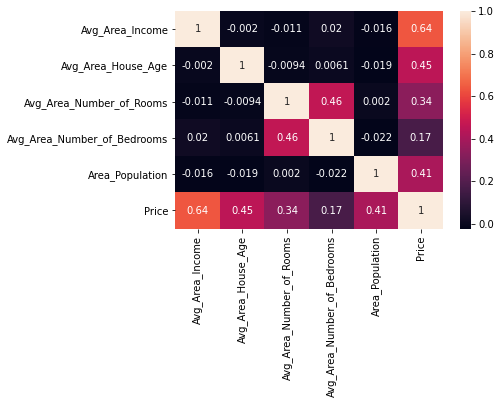

In [ ]:
sns.heatmap(uh.corr(),annot=True)

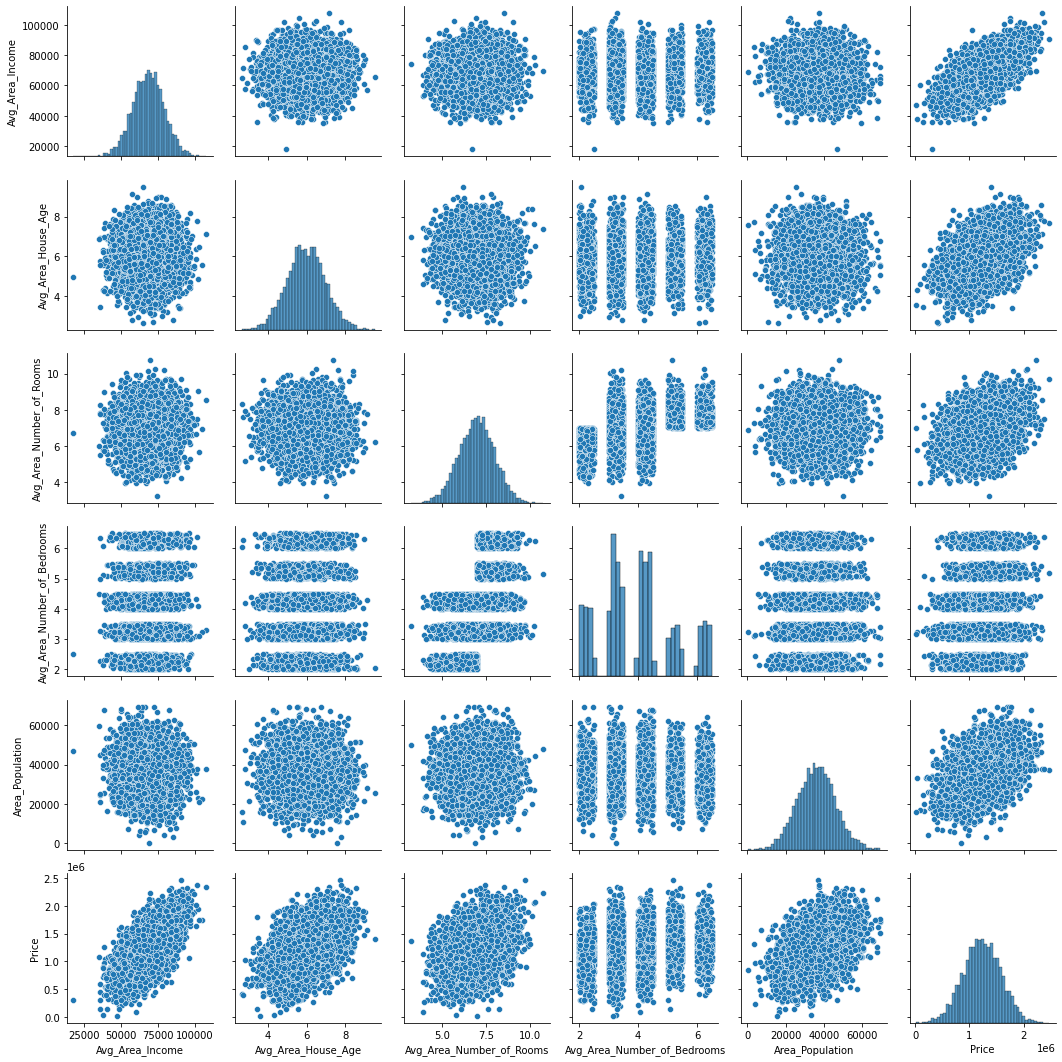

In [ ]:
sns.pairplot(uh)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


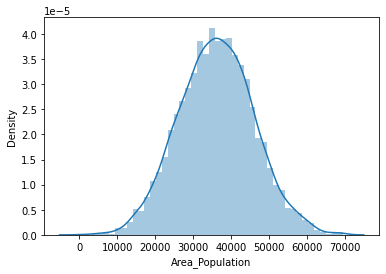

In [ ]:
print(sns.distplot(uh.Area_Population))

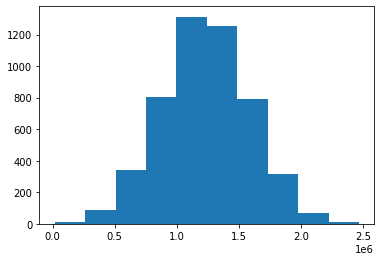

In [ ]:
plt.hist(uh.Price)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


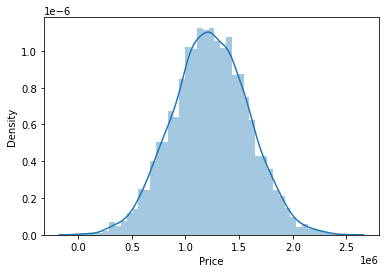

In [ ]:
print(sns.distplot((uh.Price)))

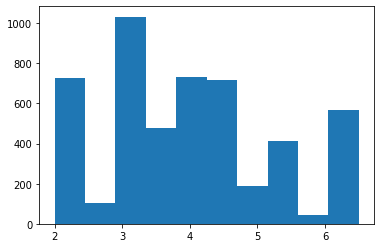

In [ ]:
plt.hist(uh.Avg_Area_Number_of_Bedrooms)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


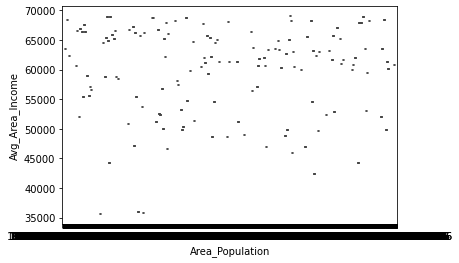

In [ ]:
sns.boxplot(uh.Area_Population[uh.Area_Population<37000],uh.Avg_Area_Income[uh.Avg_Area_Income<69000])


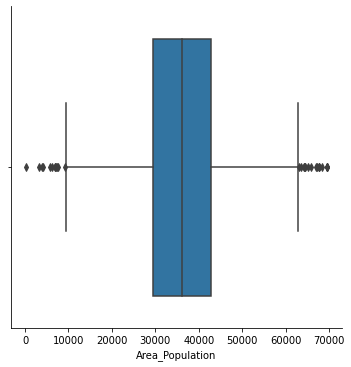

In [ ]:
sns.catplot(x='Area_Population', kind='box', data=uh)

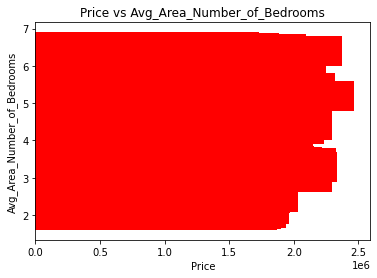

In [ ]:
plt.barh(uh["Avg_Area_Number_of_Bedrooms"],width=uh["Price"],color="r")
plt.title("Price vs Avg_Area_Number_of_Bedrooms")
plt.ylabel("Avg_Area_Number_of_Bedrooms")
plt.xlabel("Price");

## Linear Regression using PCA

In [ ]:
x = uh.iloc[:, 0: 5].values
x
y = uh.iloc[:, 5].values
y

array([1059033.558, 1505890.915, 1058987.988, ..., 1030729.583,
       1198656.872, 1298950.48 ])

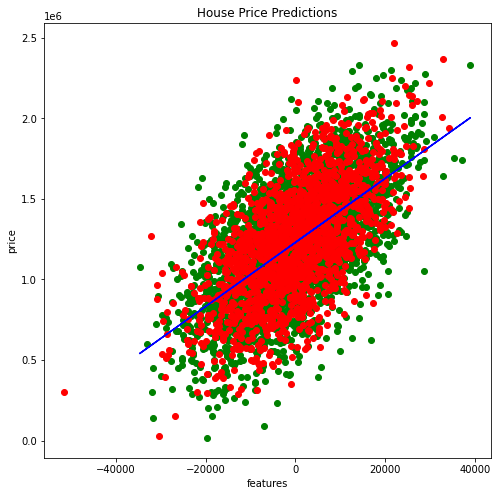

In [ ]:
# splitting the dataset in to training set and test set


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/3.0, random_state = 0)

#Fitting simple linear Regression to training set

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#predicting the test set results

y_pred = regressor.predict(x_test)

#visualising the training set results
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, color = 'green')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('House Price Predictions')
plt.xlabel('features')
plt.ylabel('price')
plt.show()

## Artificial Neural Networks

In [ ]:
input_mean = np.mean(x, axis = 0)
input_std = np.std(x, axis = 0)

output_mean = np.mean(y)
output_std = np.std(y)

In [ ]:
scaler=StandardScaler()
scaler.fit(x)
StandardScaler(copy=True, with_mean=True, with_std=True)
x_norm = scaler.transform(x)
y_norm = (y - np.mean(y)) / (np.std(y))

In [ ]:
print(x_norm)
print(y_norm)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]
[-0.49008146  0.77550829 -0.49021053 ... -0.570244   -0.0946402
  0.18941143]


In [ ]:
# Create a model


def get_model():
  model = Sequential([
      Dense(10, input_shape = (5,), activation = 'relu'),
      Dense(10, activation = 'relu'),
      Dense(5, activation = 'relu'),
      Dense(1)
      ])
  model.compile(
      loss = 'mse',
      optimizer = 'adam'

  )

  return model


In [ ]:
ann = get_model()
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# splitting the dataset in to training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_norm,test_size = 0.2, random_state = 1)
# x_val, x_test, y_val, y_test = train_test_split(x_test,y_test,test_size = 0.5, random_state = 0)

print('Training set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Training set: (4000, 5) (4000,)
Test set: (1000, 5) (1000,)


In [ ]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

In [ ]:
es_cb = EarlyStopping(monitor = 'val_loss', patience = 10)

model = get_model()
preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    callbacks = [es_cb]
)

Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.9216 - val_loss: 0.5948
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4039 - val_loss: 0.1995
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1726 - val_loss: 0.1491
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1321 - val_loss: 0.1337
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1158 - val_loss: 0.1184
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1047 - val_loss: 0.1092
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1003 - val_loss: 0.1060
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0964 - val_loss: 0.1004
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 0.0951 - val_loss: 0.0985
Epoch 10/100
125/125 [==============================] - 0s 1ms/step - loss: 0.0927 - val_lo

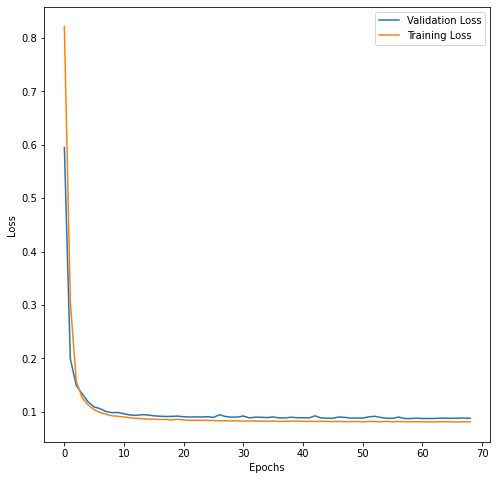

In [ ]:
plot_loss(history)

In [ ]:
preds_on_trained = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


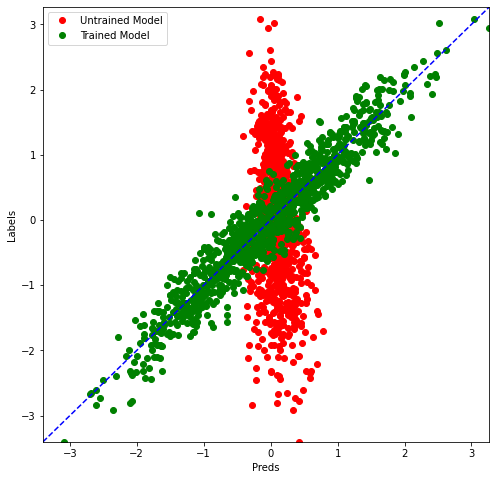

In [ ]:
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

Text(0, 0.5, 'Labels')

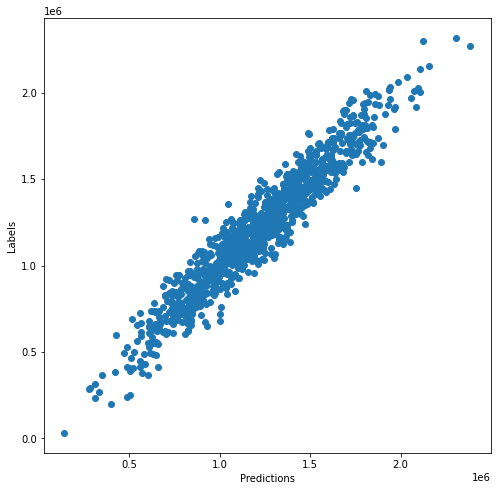

In [ ]:
actual = y_test*output_std + output_mean
predicted = preds_on_trained*output_std + output_mean
plt.figure(figsize=(8,8))
plt.plot(predicted, actual, 'o')
plt.xlabel('Predictions')
plt.ylabel('Labels')

In [ ]:
Avg_Area_Income = 79545
Avg_Area_House_Age = 6
Avg_Area_Number_of_Rooms = 7
Avg_Area_Number_of_Bedrooms = 4
Area_Population = 23085

input = np.array([[Avg_Area_Income,
                   Avg_Area_House_Age,
                   Avg_Area_Number_of_Rooms,
                   Avg_Area_Number_of_Bedrooms,
                   Area_Population]])

input = (input-input_mean) / (input_std)
output = model.predict(input)

output = output*output_std + output_mean

print("Price of the house will be", output[0,0])

Price of the house will be 1254640.0
